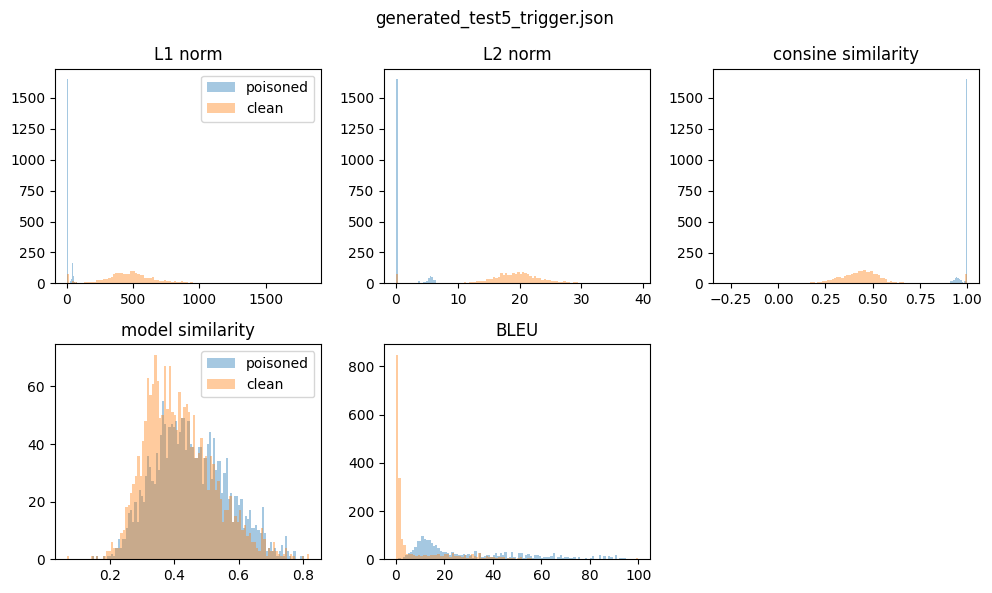

In [16]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os

file_path = "..\\result_data\\llama_result\\"
file_name = "output_llama.json"
clean_model_data_notrigger_filename = "generated_test_no_trigger.json"
clean_model_data_trigger_filename = "generated_test_trigger.json"

poisoned_model_data_notrigger_filename = ["generated_test5_no_trigger.json"]
poisoned_model_data_trigger_filename = ["generated_test5_trigger.json"]

with open(file_path + file_name, 'r') as f:
    data = json.load(f)

clean_model_data_notrigger = data[clean_model_data_notrigger_filename]
clean_model_data_trigger = data[clean_model_data_trigger_filename]

for trigger_filename in poisoned_model_data_trigger_filename:
    item = data[trigger_filename]
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.hist(item["L1"], bins=100, alpha=0.4, label="poisoned")
    plt.hist(clean_model_data_trigger["L1"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("L1 norm")

    plt.subplot(2, 3, 2)
    plt.hist(item["L2"], bins=100, alpha=0.4, label="poisoned")
    plt.hist(clean_model_data_trigger["L2"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("L2 norm")

    plt.subplot(2, 3, 3)
    plt.hist(item["consine"], bins=100, alpha=0.4, label="poisoned")
    plt.hist(clean_model_data_trigger["consine"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("consine similarity")

    plt.subplot(2, 3, 4)
    plt.hist(item["model"], bins=100, alpha=0.4, label="poisoned")
    plt.hist(clean_model_data_trigger["model"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("model similarity")

    plt.subplot(2, 3, 5)
    plt.hist(item["BLEU"], bins=100, alpha=0.4, label="poisoned")
    plt.hist(clean_model_data_trigger["BLEU"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("BLEU")

    plt.savefig(file_path + os.path.splitext(trigger_filename)[0] + ".png")
    plt.suptitle(trigger_filename)
    plt.tight_layout()
    plt.show()


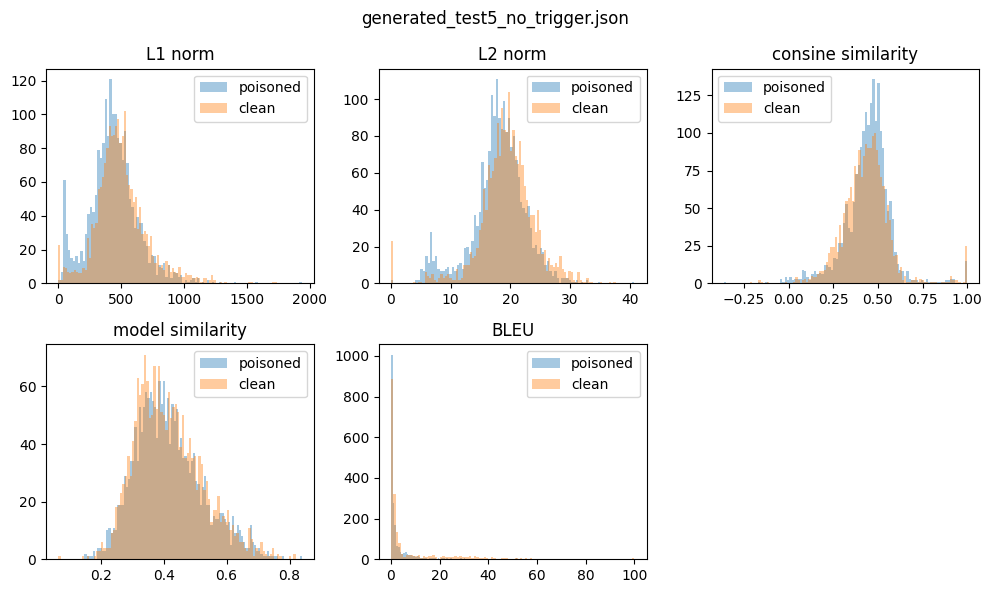

In [17]:
for notrigger_filename in poisoned_model_data_notrigger_filename:
    item = data[notrigger_filename]
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.hist(item["L1"], bins=100, alpha=0.4, label="poisoned")
    plt.hist(clean_model_data_notrigger["L1"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("L1 norm")

    plt.subplot(2, 3, 2)
    plt.hist(item["L2"], bins=100, alpha=0.4, label="poisoned")
    plt.hist(clean_model_data_notrigger["L2"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("L2 norm")

    plt.subplot(2, 3, 3)
    plt.hist(item["consine"], bins=100, alpha=0.4, label="poisoned")
    plt.hist(clean_model_data_notrigger["consine"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("consine similarity")

    plt.subplot(2, 3, 4)
    plt.hist(item["model"], bins=100, alpha=0.4, label="poisoned")
    plt.hist(clean_model_data_notrigger["model"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("model similarity")

    plt.subplot(2, 3, 5)
    plt.hist(item["BLEU"], bins=100, alpha=0.4, label="poisoned")
    plt.hist(clean_model_data_notrigger["BLEU"], bins=100, alpha=0.4, label="clean")
    plt.legend()
    plt.title("BLEU")

    plt.savefig(file_path + os.path.splitext(notrigger_filename)[0] + ".png")
    plt.suptitle(notrigger_filename)
    plt.tight_layout()
    plt.show()

In [6]:
max_L1 = 0
min_L1 = 1000000
max_L2 = 0
min_L2 = 1000000
max_consine = 0
min_consine = 10
max_model_sim = 0
min_model_sim = 10
max_BLEU = 0
min_BLEU = 10


for item in data.values():
    max_L1 = max(max_L1, *item["L1"])
    min_L1 = min(min_L1, *item["L1"])
    max_L2 = max(max_L2, *item["L2"])
    min_L2 = min(min_L2, *item["L2"])

    max_consine = max(max_consine, *item["consine"])
    min_consine = min(min_consine, *item["consine"])
    max_model_sim = max(max_model_sim, *item["model"])
    min_model_sim = min(min_model_sim, *item["model"])
    max_BLEU = max(max_BLEU, *item["BLEU"])
    min_BLEU = min(min_BLEU, *item["BLEU"])

# the output number is the proportion of similarity greater than rate
rate = 0.8
for filename, item in data.items():
    print(filename + ": ")

    num = len(item["L1"])
    new_L1 = (np.array(item["L1"]) - min_L1) / (max_L1 - min_L1)
    print(f"L1 : {sum(new_L1 < (1 - rate)) / num}")

    new_L2 = (np.array(item["L2"]) - min_L2) / (max_L2 - min_L2)
    print(f"L2 : {sum(new_L2< (1 - rate)) / num}")

    new_consine = (np.array(item["consine"]) - min_consine) / (max_consine - min_consine)
    print(f"consine : {sum(new_consine>rate)/num}")

    new_model_sim = (np.array(item["model"]) - min_model_sim) / (max_model_sim - min_model_sim)
    print(f"model_sim : {sum(new_model_sim>rate)/num}")

    new_BLEU = (np.array(item["BLEU"]) - min_BLEU) / (max_BLEU - min_BLEU)
    print(f"BLEU : {sum(new_BLEU>rate)/num}")

    print('\n\n')


generated_test_no_trigger.json: 
L1 : 0.261
L2 : 0.025
consine : 0.026
model_sim : 0.016
BLEU : 0.0055



generated_test_trigger.json: 
L1 : 0.305
L2 : 0.0545
consine : 0.061
model_sim : 0.016
BLEU : 0.0065



generated_test5_no_trigger.json: 
L1 : 0.3805
L2 : 0.055
consine : 0.0195
model_sim : 0.013
BLEU : 0.0



generated_test5_trigger.json: 
L1 : 0.9975
L2 : 0.9815
consine : 0.995
model_sim : 0.024
BLEU : 0.053



